In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (вес в кг рост в м).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

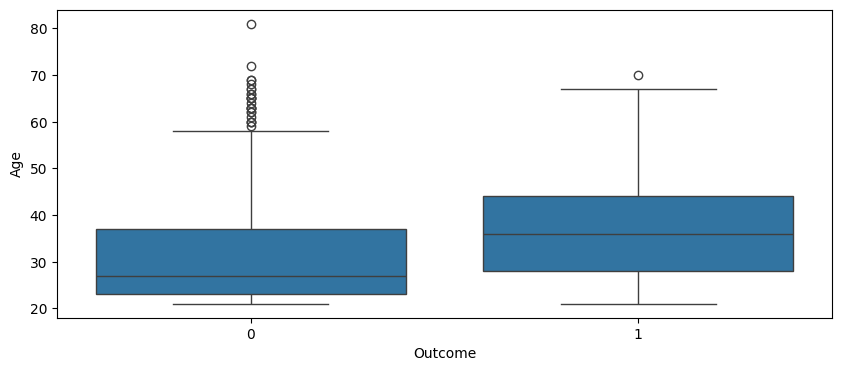

In [14]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = diabetes.columns
# print(sber_data[cols].isnull())
sns.boxplot(y=diabetes['Age'], x=diabetes['Outcome'], data=diabetes);

In [76]:
#drop duplicates
dupl_columns=list(diabetes.columns)
mask = diabetes.duplicated(subset=dupl_columns)
diab_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diab_duplicates.shape[0]}')

Число найденных дубликатов: 10


In [77]:
diabetes.drop_duplicates(subset=dupl_columns, inplace=True)
print(f'Результирующее число записей: {diabetes.shape[0]}')

Результирующее число записей: 768


In [78]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 66.0+ KB


Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [79]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    # display(top_freq)
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # display(f' unique {nunique_ratio}')
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [80]:
diabetes.drop(low_information_cols, axis=1, inplace=True)
print(f'Результирующее число признаков: {diabetes.shape}')

Результирующее число признаков: (768, 9)


Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

  нет ответа 

In [81]:
cols_null_percent = diabetes.isnull().mean() * 100
display(cols_null_percent)
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null) # Series - where Index- name of column with NaN; Value- % of NaN

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Series([], dtype: float64)

In [82]:
# l_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# diabetes = diabetes[l_col].map(lambda x: np.nan if x == 0 else x)
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

In [83]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [84]:
cols_null_percent = diabetes.isnull().mean()
# display(cols_null_percent)
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
# display(cols_with_null)
diabetes.isnull().mean().round(3).sort_values(ascending=False)

Insulin                     0.487
SkinThickness               0.296
BloodPressure               0.046
BMI                         0.014
Glucose                     0.007
Pregnancies                 0.000
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64

In [85]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [ ]:
# for col in diabetes.columns:
#     if diabetes[col].isnull().mean() > 0.30:
#         del diabetes[col]
# diabetes.isnull().mean().round(2).sort_values(ascending=False)

#создаем копию исходной таблицы
drop_data = diabetes.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes.shape[0]*0.7  # tresh = len(drop_data.index)
# tresh = len(drop_data.index)*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = diabetes.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 2 пропуска (всего столбцов 8)
drop_data = drop_data.dropna(thresh=6)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
drop_data.isnull().mean().round(2).sort_values(ascending=False)

In [91]:
# all changes are saved in 'diabets'
diabetes = drop_data

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [96]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [95]:
fill_data = diabetes.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Pregnancies': fill_data['Pregnancies'].median(),
    'Glucose': fill_data['Glucose'].median(),
    'BloodPressure': fill_data['BloodPressure'].median(),
    'SkinThickness': fill_data['SkinThickness'].median(),
    'BMI': fill_data['BMI'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
# fill_data.isnull().mean()
#Посмотрим, на то, как изменились распределения наших признаков:
fill_data['SkinThickness'].mean()

29.109067017082786

In [98]:
# cleaned df diabetes_cl
diabetes_cl = fill_data

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


(87, 8)

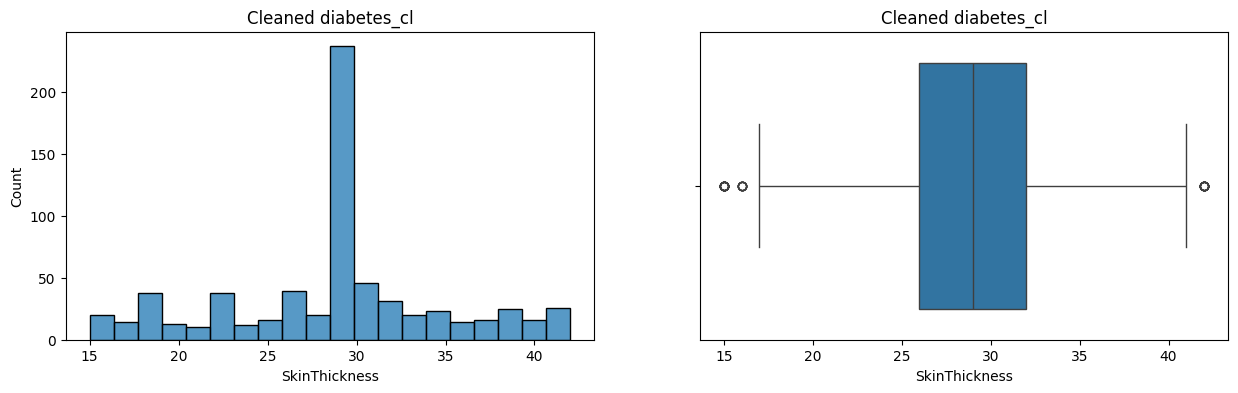

In [105]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=True):
    if log_scale == True:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

features='SkinThickness'
outliers, cleaned=outliers_iqr_mod(diabetes_cl, features, 1.5, 1.5, False)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='SkinThickness', ax=axes[0]);
histplot.set_title('Cleaned diabetes_cl');
boxplot = sns.boxplot(data=cleaned, x='SkinThickness', ax=axes[1]);
boxplot.set_title('Cleaned diabetes_cl');
outliers.shape

In [106]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(diabetes_cl, 'SkinThickness', 3, 3, log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


(29, 8)

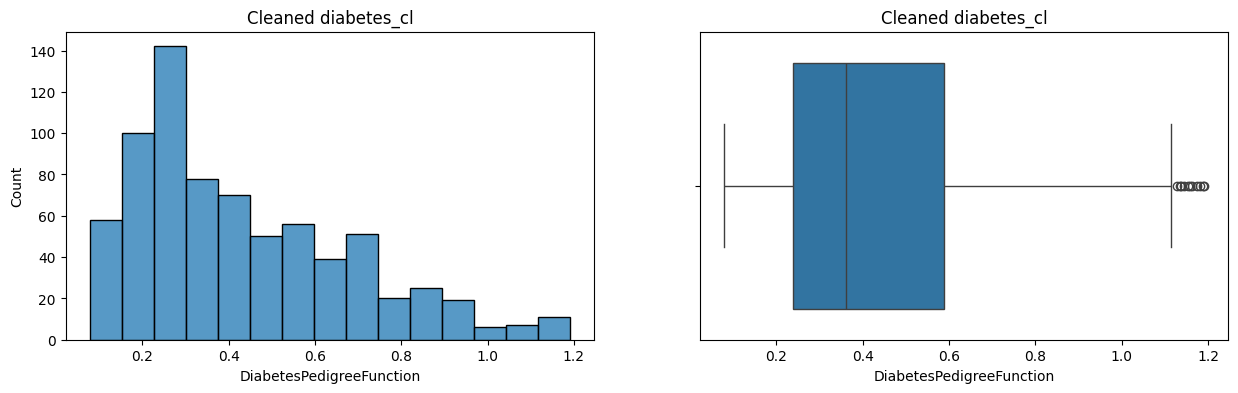

In [107]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=True):
    if log_scale == True:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

features='DiabetesPedigreeFunction'
outliers, cleaned=outliers_iqr_mod(diabetes_cl, features, 1.5, 1.5, False)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='DiabetesPedigreeFunction', ax=axes[0]);
histplot.set_title('Cleaned diabetes_cl');
boxplot = sns.boxplot(data=cleaned, x='DiabetesPedigreeFunction', ax=axes[1]);
boxplot.set_title('Cleaned diabetes_cl');
outliers.shape

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761


(0, 8)

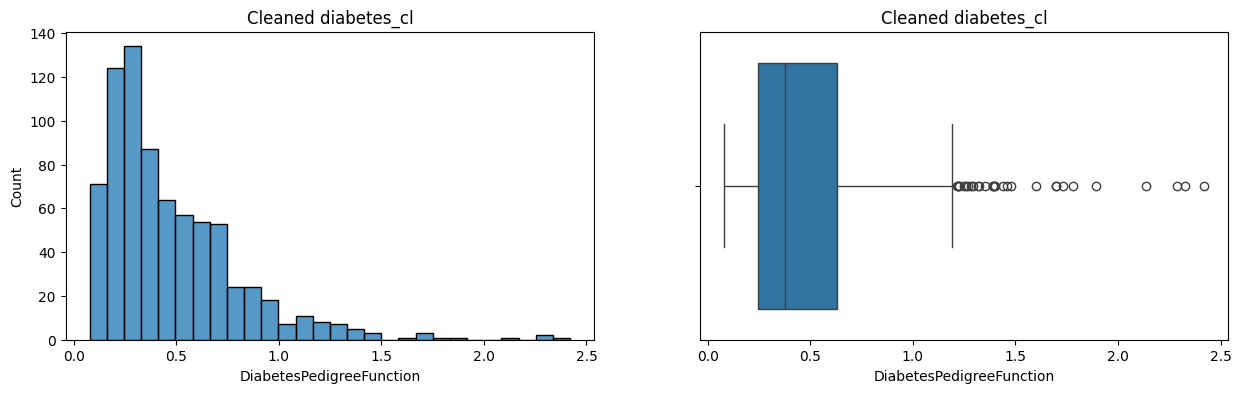

In [108]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=True):
    if log_scale == True:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

features='DiabetesPedigreeFunction'
outliers, cleaned=outliers_iqr_mod(diabetes_cl, features, 1.5, 1.5, True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='DiabetesPedigreeFunction', ax=axes[0]);
histplot.set_title('Cleaned diabetes_cl');
boxplot = sns.boxplot(data=cleaned, x='DiabetesPedigreeFunction', ax=axes[1]);
boxplot.set_title('Cleaned diabetes_cl');
outliers.shape

In [111]:
boxplot.__class__
features.__class__
diabetes_cl.__class__

pandas.core.frame.DataFrame